# Orbitales Atómicos

Para la parte angular se tiene la ecuación de valores propios

$$
\Lambda^2 Y_l^{m_l} = -l(l+1)\hbar^2 Y_l^{m_l}
$$

donde $\Lambda^2$ es el Legendriano.

```{admonition} Inserto matemático: Legendriano
:class: dropdown

El Legendriano $\Lambda^2$ se define por

$$
\Lambda^2 = \frac{1}{\sin^2 \theta} \frac{\partial^2}{\partial \phi^2} + \frac{1}{\sin \theta} \frac{\partial}{\partial \theta} \sin \theta \frac{\partial}{\partial \theta} 
$$
```

**La solución a la parte angular son los armónicos esféricos $Y_l^{m_l}(\theta,\phi)$.**

Note que $l$ y $m_l$ son números cuánticos que deben cumplir:

```{margin}
$l$ es el `número cuántico azimutal` o `momento angular`.
```
$$
l = 0,1,2,3,...
$$

```{margin}
$m_l$ es el `número cuántico magnético`.
```
$$
m_l = -l,-l+1,...,0,...,l-1,l
$$

En la tabla se muestran los primeros armónicos esféricos.


|$l$|$m_l$|Armónico esférico $Y_l^{m_l}(\theta,\phi)$|
|---|---|---|
|0|0|$\frac{1}{(4\pi)^{1/2}}$|
|1|-1|$+\frac{3}{(8\pi)^{1/2}} \sin \theta e^{-i\phi}$|
|1|0|$\frac{3}{(4\pi)^{1/2}} \cos \theta$|
|1|1|$-\frac{3}{(8\pi)^{1/2}} \sin \theta e^{i\phi}$|
|2|-2|$\frac{15}{(32\pi)^{1/2}} \sin^2 \theta e^{-2i\phi}$|
|2|-1|$+\frac{15}{(8\pi)^{1/2}} \sin \theta \cos \theta e^{-i\phi}$|
|2|0|$\frac{5}{(16\pi)^{1/2}} (3\cos^2 \theta - 1)$|
|2|1|$-\frac{15}{(8\pi)^{1/2}} \sin \theta \cos \theta e^{i\phi}$|
|2|2|$\frac{15}{(32\pi)^{1/2}} \sin^2 \theta e^{2i\phi}$|

**Importe las siguientes librerías**
- numpy
- pyplot de matplotlib
- special de scipy

In [1]:
# Librerías

In [2]:
#%matplotlib notebook
from scipy import special
import numpy as np
from matplotlib import pyplot as plt

Definimos un mallado que considere $\theta \in [0,\pi]$ y $\phi\in[0,2\pi]$

La idea es pensar en graficar una figura en tres dimensiones
<img src="https://fotos.subefotos.com/c3fdbd7a7bdcdf59a0ba48e8d85191b5o.jpg" alt="Figura 3D" width="200"/>
y que necesitaremos todas las combinaciones de todos los valores de $\theta$ y $\phi$
<img src="https://fotos.subefotos.com/c89ac08947348992ec8fb7765039accfo.jpg" alt="Representación de mallado" width="200"/>

````{admonition} Aprendizaje de código
:class: important 
Utilice las siguientes instrucciones
```
theta = np.linspace(0,np.pi,200)
phi = np.linspace(0,2*np.pi,200)
THETA,PHI = np.meshgrid(theta,phi)
```
````

In [3]:
# Mallado

In [4]:
theta = np.linspace(0,np.pi,200)
phi = np.linspace(0,2*np.pi,200)
THETA,PHI = np.meshgrid(theta,phi)

Seleccione un valor de $l$ y $m_l$ 
```{note}
se recomienda $l=1$ y $m_l=1$ para empezar, pero puede probar con otros
```

In [5]:
# Seleccione l y ml

In [6]:
l = 1
ml = 1

A continuación graficaremos armónicos esféricos y su cuadrado.

````{admonition} Aprendizaje de código
:class: important
Copie y pegue el siguiente código

```
R = abs(special.sph_harm(ml,l,PHI,THETA))
R = R**2

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='cividis')
ax.set_xlim(-R.max(),R.max())
ax.set_ylim(-R.max(),R.max())
ax.set_zlim(-R.max(),R.max())

ax.set_title("$Y^2$"+" l="+str(l)+" ml="+str(ml))

plt.show()
```
````

In [7]:
# Gráfica

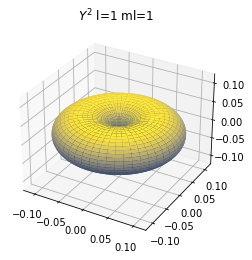

In [8]:
R = abs(special.sph_harm(ml,l,PHI,THETA))
R = R**2

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='cividis')
ax.set_xlim(-R.max(),R.max())
ax.set_ylim(-R.max(),R.max())
ax.set_zlim(-R.max(),R.max())

ax.set_title("$Y^2$"+" l="+str(l)+" ml="+str(ml))

plt.show()

Recordemos que la eigenfunción es el producto de una parte radial y una parte angular $\psi_{n,l,m_l}=R_{n,l}(r)Y_l^{m_l}(\theta,\phi)$

Nombraremos a los orbitales p como:

$$
\color{green}{p_z} &=& R_{n1} \color{blue}{Y_{1}^{0}} = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} \cos \theta \\
\color{green}{p_-} &=& R_{n1} \color{blue}{Y_{1}^{-1}} = R_{n1} \left(\frac{3}{8 \pi}\right)^{1/2} \sin \theta \color{red}{e^{-i\phi}}\\
\color{green}{p_+} &=& R_{n1} \color{blue}{Y_{1}^{+1}} = -R_{n1} \left(\frac{3}{8 \pi}\right)^{1/2} \sin \theta \color{red}{e^{i\phi}}
$$

El orbital $p_z$ es real, pero $p_-$ y $p_+$ son complejos. Recordando la fórmula de Euler:

$$
e^{-i\phi} &=& \cos(\phi) - i \sin(\phi)\\
-e^{i\phi} &=& -\cos(\phi) - i \sin(\phi)
$$

Hacemos la combinación lineal:

$$
\color{purple}{p_x} &=& \frac{1}{\sqrt{2}}(\color{green}{p_-} - \color{green}{p_+}) = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} \sin \theta \cos \phi \\
\color{purple}{p_y} &=& \frac{i}{\sqrt{2}}(\color{green}{p_-} + \color{green}{p_+}) = R_{n1} \left(\frac{3}{4 \pi}\right)^{1/2} \sin \theta \sin \phi 
$$

Represente la parte angular de las combinaciones lineales de $p_-$ y $p_+$ para formar $p_x$ y $p_y$.

In [9]:
# px y py

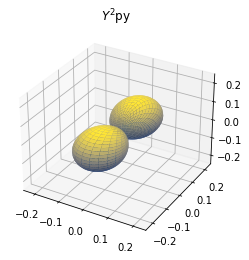

In [10]:
Rz = special.sph_harm(0,1,PHI,THETA)
R_m = special.sph_harm(-1,1,PHI,THETA)
R_p = special.sph_harm(+1,1,PHI,THETA)

R_x = (R_m-R_p)/np.sqrt(2)
R_y = 1j*(R_m+R_p)/np.sqrt(2)

R = abs(R_y)
orb_name = "py"
R = R**2

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='cividis')
ax.set_xlim(-R.max(),R.max())
ax.set_ylim(-R.max(),R.max())
ax.set_zlim(-R.max(),R.max())
ax.set_title("$Y^2$"+orb_name)

plt.show()

A continuación se dan las expresiones de algunos orbitales

|Orbital|Eigenfunción|
|-------|---------------|
|$1s$|$N_1 e^{-r}$|
|$2s$|$N_2 (2-r)e^{-r/2}$|
|$2p_x$|$N_2 r \sin\theta \cos\phi e^{-r/2}$|
|$2p_y$|$N_2 r \sin\theta \sin\phi e^{-r/2}$|
|$2p_z$|$N_2 r \cos\theta e^{-r/2}$|

donde $N_1$ y $N_2$ son factores de normalización.


## Referencias

- J. Autschbach, Orbitals: Some Fiction and Some Facts, J. Chem. Educ. 89, 1032 (2012).
- P.C. Hiberty, F. Volatron, y S. Shaik, In Defense of the Hybrid Atomic Orbitals, J. Chem. Educ. 89, 575 (2012).
- M. Labarca y O. Lombardi, Why orbitals do not exist?, Foundations of Chemistry 12, 149 (2010).
- F.W. Eagle, K.D. Seaney, y M.P. Grubb, Musical Example To Visualize Abstract Quantum Mechanical Ideas, J. Chem. Educ. 94, 1989 (2017).
- P. W. Atkins, y R. Friedman, Molecular Quantum Mechanics (Oxford University Press, 2005).
- F.L. Pilar, Elementary Quantum Chemistry (Dover ed., 2001).
- I.N. Levine, D.H. Busch, y H. Shull, Quantum chemistry (Pearson Prentice Hall Upper Saddle River, NJ, 2009).
- D.A. McQuarrie y J.D. Simon, Physical Chemistry: A Molecular Approach (University Science Books, 1997).